In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problemas máquina inducción

## Problema 1

Un motor de inducción trifásico de gran potencia está alimentado desde una red de media tensión (MT) a través de un transformador. Las características nominales del motor (datos de la placa de características) son:

- Velocidad nominal: $n_M = 2930$ rpm
- Potencia nominal: $ P_u = 75$ kW
- Rendimiento: $\eta = 86.27\%$
- Tensión nominal: $U_n=400$ V
- Factor de potencia nominal: fp = 0.92

Por su parte, los datos del transformador son:

- Potencia nominal: $S_n=125$ kVA
- 20/0.4 kV Yy0
- Datos de cc: $\epsilon_{cc}=5\%$, $\cos\varphi_{cc}=0.2$
- Datos de vacío: $P_0=5$ kW, $\cos\varphi_0=0.1$

Determinar, para el punto de funcionamiento nominal del motor:

<ol type="a">
    <li>Potencias activa y reactiva absorbidas por el motor</li>
    <li>Par mecánico útil del motor</li>
    <li>Índice de carga del transformador</li>
    <li>Regulacion del transformador</li>
    <li>Rendimiento del transformador</li>
</ol>

In [2]:
# Solución problema 1

n_m = 2930 # rpm
Pu = 75.0e3 # W
rto_m = 0.8627
Un = 400 # V
fp_m = 0.92

S_t = 125.0e3 #kVA
U1n, U2n = 20.0e3, 400.0
e_cc, fp_cc = 0.05, 0.2
P0, fp_0 = 5.0e3, 0.1

import numpy as np

Pe = Pu/rto_m
Qe = Pe/fp_m*np.sin(np.arccos(fp_m))

Mu = Pe/(n_m*2*np.pi/60)

# el índice de carga expresado como la relación entre la S2 y la S nominal del trafo
c = np.sqrt(Pe**2 + Qe**2)/S_t

reg = c*e_cc*np.cos(np.arccos(fp_cc)-np.arccos(fp_m))

# para el rendimiento es necesario conocer la potencia del ensayo de cc (Pcc):
# rto = P2 / (P2+P0+c**2*Pcc)
# Pcc se puede obtener a partir de los datos de cc del enunciado:
# --> condiciones ensayo cc: alimentación a Ucc con corriente I2n: 
# --> |Zcc| = |Ucc_fase|/|I2n|
I2n = S_t/U2n/np.sqrt(3)
Zcc = (e_cc*U2n/np.sqrt(3))/I2n
Rcc = Zcc*fp_cc
Pcc = 3*Rcc*I2n**2
rto = Pe/(Pe + P0 + c**2*Pcc)

print ("SOLUCIÓN 1")
print ("Pe = {:.3f} kW".format(Pe/1000))
print ("Qe = {:.3f} kvar".format(Qe/1000))
print ("Mu = {:.3f} kvar".format(Mu))
print ("índice de carga (c) = {:.3f}".format(c))
print ("Regulación del trafo (reg) = {:.3f} %".format(reg*100))
print ("Rendimiento del trafo = {:.3f}".format(rto))



SOLUCIÓN 1
Pe = 86.936 kW
Qe = 37.035 kvar
Mu = 283.338 kvar
índice de carga (c) = 0.756
Regulación del trafo (reg) = 2.147 %
Rendimiento del trafo = 0.938


---
## Problema 2

Un motor de inducción trifásico conectado en estrella a una red de 380 V y 50 Hz tiene unas pérdidas en el hierro de 280 W. A plena carga desarrolla un par útil de 44 Nm girando a 710 rpm. En este régimen de carga la potencia en el entrehierro es de 3500 W.

En esas condiciones, determinar:

1. Potencia en el eje del motor
2. Deslizamiento con el que trabaja el motor
3. Resistencia estatórica sabiendo que la potencia absorbida de la red es de 3870 W con un factor de potencia de 0.82
4. Pérdidas mecánicas y pérdidas Joule en el rotor
5. Rendimiento del motor

In [3]:
# Solución 2
#---
import numpy as np

U = 380.0 # V
Tu = 44.0 # Nm
n = 710.0 # rpm
Pe, cos_phi = 3870.0, 0.82
Pa = 3500.0 # W
Pfe = 280.0 # W

Pu = Tu*(n*2*np.pi/60)
# la velocidad de sincronismo tiene que ser de 750 rpm (p=4)
n_s = 750
s = (n_s-n)/n_s
# Las pérdidas Joule se pueden calcular de un balance de potencias:
# Pe = Pje + Pfe + Pa.
# Pje = 3*Re*Ie**2
# Ie puede obtenerse de la potencia eléctrica absorbida por el motor:
# Pe = sqrt(3)*U*Ie*cos(phi)
Pje = Pe - Pfe - Pa
Ie = Pe/(np.sqrt(3)*U*cos_phi)
Re = Pje/3/Ie**2

# pérdidas Joule en el rotor: Pjr = s*Pa
Pjr = s*Pa
# pérdidas mecánicas:
Pm = Pa-Pu-Pjr
# rendimiento
rto = Pu/Pe

print ("SOLUCIÓN 2")
print ("Pu = {:.3f} kW".format(Pu/1000))
print ("s = {:.3f} %".format(s*100))
print ("Re = {:.2f} Ω".format(Re))
print ("Pjr = {:.1f} W".format(Pjr))
print ("Pm = {:.1f} W".format(Pm))
print ("Pjr = {:.1f} W".format(Pjr))
print ("rto = {:.3f} W".format(rto))


SOLUCIÓN 2
Pu = 3.271 kW
s = 5.333 %
Re = 0.58 Ω
Pjr = 186.7 W
Pm = 41.9 W
Pjr = 186.7 W
rto = 0.845 W


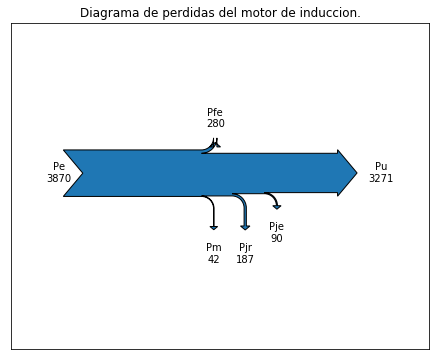

In [13]:
# Para generar el diagrama de potencias de la máquina (diagrama de Sankey)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

fig = plt.figure(figsize=(7.5,6))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Diagrama de perdidas del motor de induccion.")
sankey = Sankey(ax=ax,scale=0.0001,offset=0.2, format='%.0f', flows=[Pe, -Pje, -Pfe, -Pjr, -Pm, -Pu],
       labels=['Pe', 'Pje', 'Pfe', 'Pjr', 'Pm', 'Pu'],
       orientations=[0, -1, 1, -1, -1, 0], 
      pathlengths=[0.5,0.1,0.025,0.25,0.25,0.5])
diagrama = sankey.finish()

---
## Problema 3

En un equipo motobomba (grupo hidráulico) el motor es asíncronotrifásico con estátor hexapolar y conexión en estrella. Su tensión nominal es de 400 V y se sabe que tiene una resistencia estatórica de 1.2 Ω y unas pérdidas en el hierro de 187 W. Girando a 965 rpm el motor absorbe una potencia de 5.25 kW estando alimentado a su tensión nominal y acciona una bomba que posee un par resistente cuadrático ($M_R$) que responde a la ecuación indicada a continuación:

$$M_R = 0.0018 \Omega^2 +0.19 \Omega +8$$

determinada usando unidades del sistema internacional.

Para esas condiciones de funcionamiento, se pide:

1. Par resistente
2. Deslizamiento del motor
3. Potencia mecánica interna suponiendo unas pérdidas mecánicas de 50 W
4. Pérdidas joule en el rotor.
5. Intensidad absorbida por el motor
6. Rendimiento del motor


In [14]:
# Solución 3

import numpy as np

U = 400.0 # V
Re = 1.2 # Ω
Pfe = 187.0 # W
w = 965.0 # rpm
Pe = 5.25e3 # W
ns = 1000.0 # rpm (p=3)
Pm = 50.0 # W

def mr_bomba(omega=w,a=0.0018, b=0.19, c=8):
    omega = omega*2*np.pi/60
    return a*omega**2 + b*omega + c

# el par resistente es:
Mr = mr_bomba(w)

# deslizamiento:
s = (ns-w)/ns

# potencia mecánica interna Pmi = Pu + Pm
Pu = Mr*(w*2*np.pi/60)
Pmi = Pu + Pm

# pérdidas joule rotor: Pjr = s*Pa = s*(Pmi+Pjr)
Pjr = s/(1-s)*Pmi

# Pe = Pa + Pje + Pfe --> Pje
# Pje = 3*Re*Ie**2 --> Ie

Pje = Pe - Pjr/s - Pfe
Ie = np.sqrt(Pje/3/Re)

rto = Pu/Pe

print ("Solución 3")
print ("Mr = {:.2f} Nm".format(Mr))
print ("s = {:.3f}".format(s))
print ("Pmi = {:.1f} W".format(Pmi))
print ("Pjr = {:.1f} W".format(Pjr))
print ("Ie = {:.2f} A".format(Ie))
print ("rto = {:.3f}".format(rto))

Solución 3
Mr = 45.58 Nm
s = 0.035
Pmi = 4656.3 W
Pjr = 168.9 W
Ie = 8.13 A
rto = 0.877


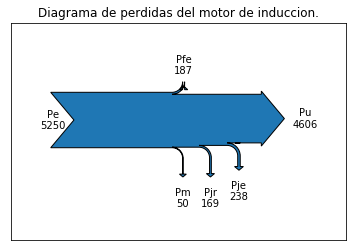

In [16]:
# Para generar el diagrama de potencias de la máquina (diagrama de Sankey)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Diagrama de perdidas del motor de induccion.")
sankey = Sankey(ax=ax,scale=0.0001,offset=0.2, format='%.0f', flows=[Pe, -Pje, -Pfe, -Pjr, -Pm, -Pu],
       labels=['Pe', 'Pje', 'Pfe', 'Pjr', 'Pm', 'Pu'],
       orientations=[0, -1, 1, -1, -1, 0], 
      pathlengths=[0.5,0.2,0.025,0.25,0.25,0.2])
diagrama = sankey.finish()